In [2]:
import pandas as pd


data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Extract dataframes for surviving and deceased patients
df_0 = data[data["DEATH_EVENT"] == 0][["creatinine_phosphokinase", "serum_creatinine", "serum_sodium", "platelets"]]
df_1 = data[data["DEATH_EVENT"] == 1][["creatinine_phosphokinase", "serum_creatinine", "serum_sodium", "platelets"]]
df_all = data[["creatinine_phosphokinase", "serum_creatinine", "serum_sodium", "platelets"]]

df_all

,creatinine_phosphokinase,serum_creatinine,serum_sodium,platelets
0,582,1.9,130,265000.00
1,7861,1.1,136,263358.03
2,146,1.3,129,162000.00
3,111,1.9,137,210000.00
4,160,2.7,116,327000.00
...,...,...,...,...
294,61,1.1,143,155000.00
295,1820,1.2,139,270000.00
296,2060,0.8,138,742000.00
297,2413,1.4,140,140000.00


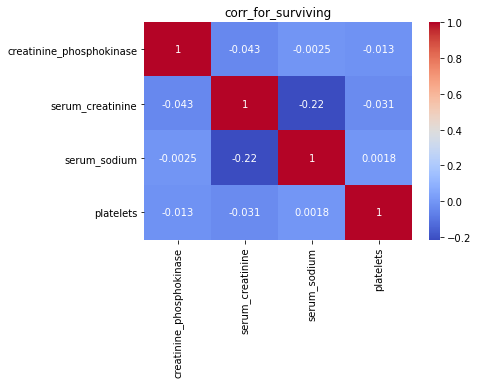

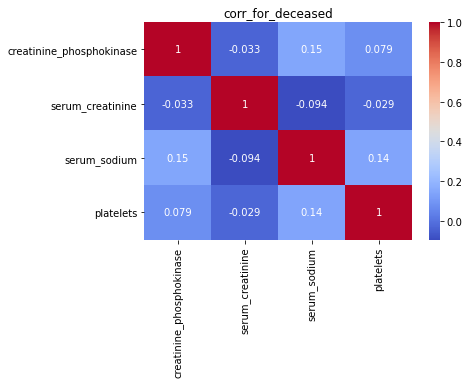

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrices
M0 = df_0.corr()
M1 = df_1.corr()

# Plot the correlation matrices
sns.heatmap(M0, annot=True, cmap="coolwarm")
plt.title("corr_for_surviving")
plt.savefig("corr_for_surviving.png")
plt.show()

sns.heatmap(M1, annot=True, cmap="coolwarm")
plt.title("corr_for_deceased")
plt.savefig("corr_for_deceased.png")
plt.show()

In [ ]:
# 3-a

Coefficients: [-8.30991562]
Intercept: 275084.9044922257
mse for linear is  10411884471.788956


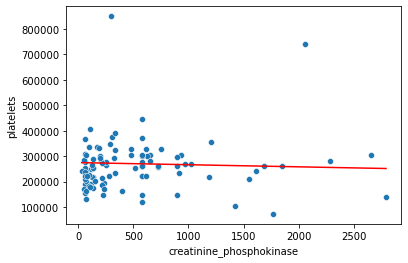

Coefficients: [-2.22818757e-06]
Intercept: 137.6816623683521
mse for linear is  14.029349615247634


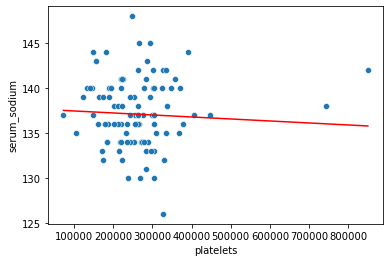

Coefficients: [-0.04590417]
Intercept: 7.527656028917578
mse for linear is  0.33148384217933496


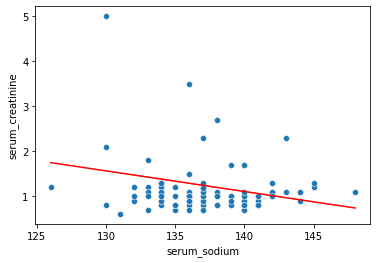

Coefficients: [-2.93473058e-07]
Intercept: 1.3144973771256638
mse for linear is  0.3318713093843874


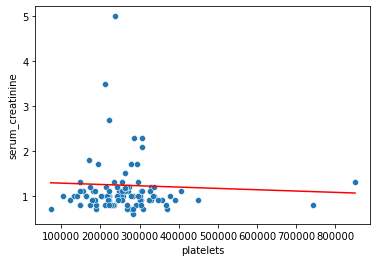

In [54]:
# 2-1 --- death event=0
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

def fit_and_eval(model, X_train, Y_train, X_test, Y_test):
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print("Coefficients:", model.coef_)
    print("Intercept:", model.intercept_)
    mse = mean_squared_error(Y_test, Y_pred)
    return Y_pred, mse

groups = [("creatinine_phosphokinase","platelets" ), 
          ("platelets", "serum_sodium"), 
          ("serum_sodium", "serum_creatinine"), 
          ("platelets", "serum_creatinine")]

for group in groups:
    X_name,Y_name = group

    X_train, X_test, y_train, y_test = train_test_split(
        df_0[[X_name]], df_0[Y_name], test_size=0.5, random_state=42)

    linear =  LinearRegression()
    y_pred, lin_mse = fit_and_eval(linear, X_train, y_train, X_test,  y_test)
    print("mse for linear is ", lin_mse)

    ax = sns.scatterplot(x=X_test.iloc[:, 0], y=y_test[:])
    sns.lineplot(x=X_test.iloc[:, 0], y=y_pred[:], color='red')
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    plt.show()
    # X_train.head()
    # y_train.head()
    # y=-7.00 * x + 270748.***

x_train shape= (101, 1)  poly shape= (101, 3)
Coefficients: [ 0.00000000e+00 -2.54719211e+01  4.29498389e-03]
Intercept: 279981.4530999773
mse for linear is  10564238127.514679


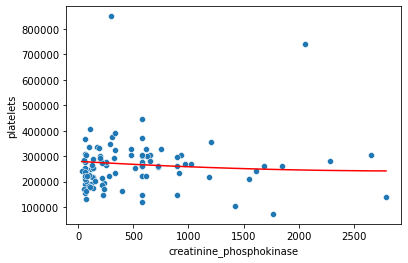

x_train shape= (101, 1)  poly shape= (101, 3)
Coefficients: [ 0.00000000e+00 -2.35282544e-05  3.54458402e-11]
Intercept: 140.54312790580153
mse for linear is  13.95875531699718


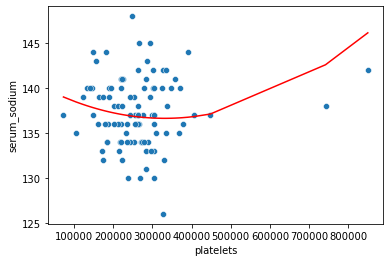

x_train shape= (101, 1)  poly shape= (101, 3)
Coefficients: [ 0.         -0.07394225  0.00010557]
Intercept: 9.385568804481117
mse for linear is  0.33037891393945557


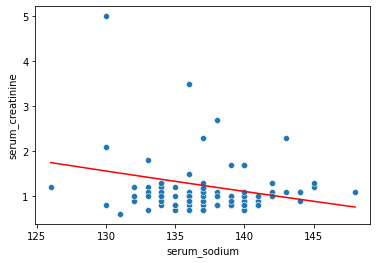

x_train shape= (101, 1)  poly shape= (101, 3)
Coefficients: [ 0.00000000e+00 -3.60956544e-06  5.51837146e-12]
Intercept: 1.759983494596006
mse for linear is  0.3729038221153976


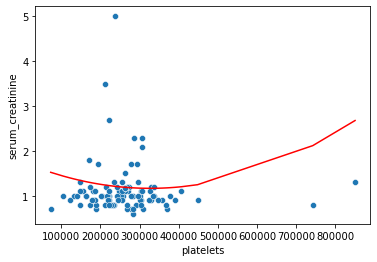

In [55]:
# 2-2 quadratic--- death event=0
for group in groups:
    X_name,Y_name = group

    X_train, X_test, y_train, y_test = train_test_split(
        df_0[[X_name]], df_0[Y_name], test_size=0.5, random_state=42)

    
    poly = PolynomialFeatures(degree=2)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    print("x_train shape=", X_train.shape, " poly shape=", X_poly_train.shape)
    
    
    linear =  LinearRegression()
    y_pred, lin_mse = fit_and_eval(linear, X_poly_train, y_train, X_poly_test,  y_test)
    print("mse for linear is ", lin_mse)

    ax = sns.scatterplot(x=X_test.iloc[:, 0], y=y_test[:])
    sns.lineplot(x=X_test.iloc[:, 0], y=y_pred[:], color='red')
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    plt.show()
    # X_train.head()
    # y_train.head()
    # y=-7.00 * x + 270748.***

x_train shape= (101, 1)  poly shape= (101, 4)
Coefficients: [ 0.00000000e+00 -7.66651954e+01  3.97721242e-02 -5.29785947e-06]
Intercept: 289486.93124485295
mse for linear is  10781571285.322273


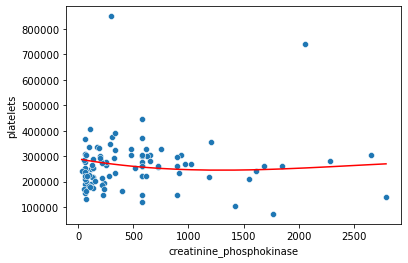

x_train shape= (101, 1)  poly shape= (101, 4)
Coefficients: [ 0.00000000e+00 -6.06610457e-05  1.84209753e-10 -1.72042556e-16]
Intercept: 143.11811508914926
mse for linear is  19.490392404910388


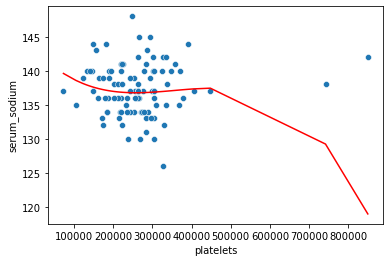

x_train shape= (101, 1)  poly shape= (101, 4)
Coefficients: [ 0.00000000e+00  2.48039480e+01 -1.91329770e-01  4.89264517e-04]
Intercept: -1064.004312931108
mse for linear is  0.34391527410829514


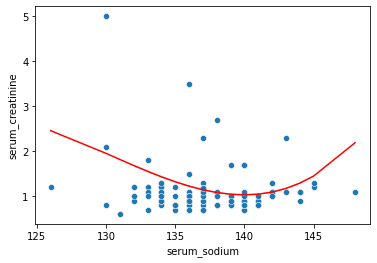

x_train shape= (101, 1)  poly shape= (101, 4)
Coefficients: [ 0.00000000e+00 -6.61709408e-07 -6.29155734e-12  1.36580886e-17]
Intercept: 1.555560973738815
mse for linear is  0.5139896136832572


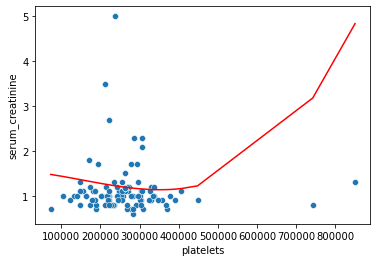

In [56]:
# 2-3 --- death event=0
for group in groups:
    X_name,Y_name = group

    X_train, X_test, y_train, y_test = train_test_split(
        df_0[[X_name]], df_0[Y_name], test_size=0.5, random_state=42)

    
    poly = PolynomialFeatures(degree=3)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    print("x_train shape=", X_train.shape, " poly shape=", X_poly_train.shape)
    
    
    linear =  LinearRegression()
    y_pred, lin_mse = fit_and_eval(linear, X_poly_train, y_train, X_poly_test,  y_test)
    print("mse for linear is ", lin_mse)

    ax = sns.scatterplot(x=X_test.iloc[:, 0], y=y_test[:])
    sns.lineplot(x=X_test.iloc[:, 0], y=y_pred[:], color='red')
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    plt.show()
    # X_train.head()
    # y_train.head()
    # y=-7.00 * x + 270748.***

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-9164.41091924]
Intercept: 321723.48014965974
mse for linear is  10691941155.494356


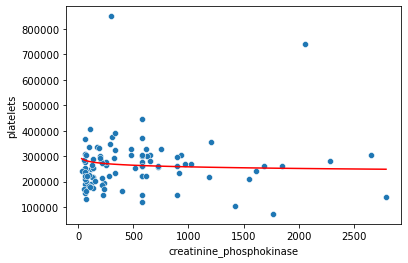

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-0.88107057]
Intercept: 148.03740404520553
mse for linear is  13.98566555395608


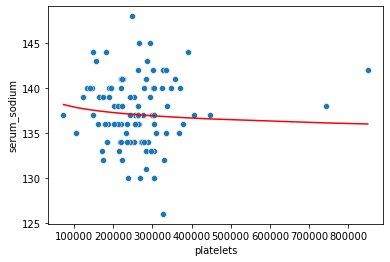

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-6.05903252]
Intercept: 31.045977155702037
mse for linear is  0.32961558715538647


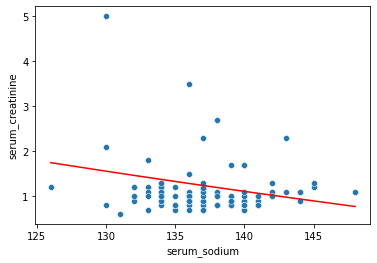

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-0.11801909]
Intercept: 2.7029949713176
mse for linear is  0.3335414171425113


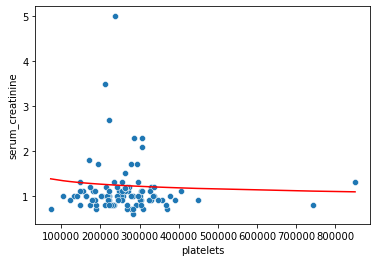

In [57]:
# 2-4 logx  --- death event=0
for group in groups:
    X_name,Y_name = group

    X_train, X_test, y_train, y_test = train_test_split(
        df_0[[X_name]], df_0[Y_name], test_size=0.5, random_state=42)

    
    X_poly_train = np.log(X_train)
    X_poly_test =  np.log(X_test)
    print("x_train shape=", X_train.shape, " poly shape=", X_poly_train.shape)
    
    
    linear =  LinearRegression()
    y_pred, lin_mse = fit_and_eval(linear, X_poly_train, y_train, X_poly_test,  y_test)
    print("mse for linear is ", lin_mse)

    ax = sns.scatterplot(x=X_test.iloc[:, 0], y=y_test[:])
    sns.lineplot(x=X_test.iloc[:, 0], y=y_pred[:], color='red')
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    plt.show()
    # X_train.head()
    # y_train.head()
    # y=-7.00 * x + 270748.***

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-0.04553472]
Intercept: 12.69247886194832
mse for logx logy is  10910163710.045422


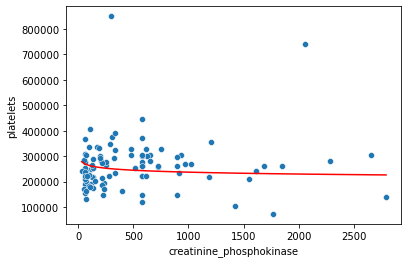

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-0.00630852]
Intercept: 4.998525449991479
mse for logx logy is  14.021172357745549


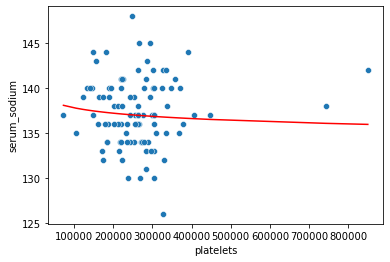

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-3.65547383]
Intercept: 18.100160407617242
mse for logx logy is  0.31470702917918497


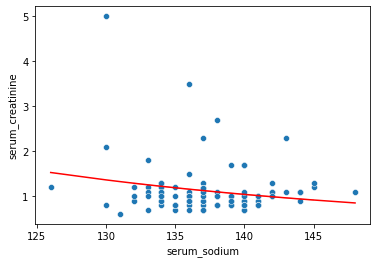

x_train shape= (101, 1)  poly shape= (101, 1)
Coefficients: [-0.08590434]
Intercept: 1.1834182778680686
mse for logx logy is  0.32287659967822274


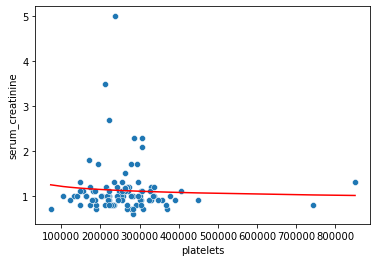

In [59]:
# 2-5 logx logy  --- death event=0
for group in groups:
    X_name,Y_name = group

    X_train, X_test, y_train, y_test = train_test_split(
        df_0[[X_name]], df_0[Y_name], test_size=0.5, random_state=42)

    
    X_poly_train = np.log(X_train)
    X_poly_test =  np.log(X_test)
  
    y_train_log = np.log(y_train)
    y_test_log = np.log(y_test)
    print("x_train shape=", X_train.shape, " poly shape=", X_poly_train.shape)
    
    
    linear =  LinearRegression()
    y_pred, lin_mse = fit_and_eval(linear, X_poly_train, y_train_log, 
                                   X_poly_test,  y_test_log)
    
    mse = mean_squared_error(y_test, np.exp(y_pred))
    print("mse for logx logy is ", mse)

    ax = sns.scatterplot(x=X_test.iloc[:, 0], y=y_test[:])
    sns.lineplot(x=X_test.iloc[:, 0], y=np.exp(y_pred[:]), color='red')
    ax.set_xlabel(X_name)
    ax.set_ylabel(Y_name)
    plt.show()
    # X_train.head()
    # y_train.head()
    # y=-7.00 * x + 270748.***

In [51]:
np.log([2.71828])


array([0.99999933])